In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all = pd.read_csv("../data/TwoBarTruss.csv", delimiter=';')

In [48]:
df_all.head()

,Volume,MaxStress,x1,x2,y,g1,Feasible
0,0.021916,18377.203009,0.002354,0.004815,2.115106,-81622.796991,1
1,0.031101,12991.022813,0.003331,0.006803,2.129376,-87008.977187,1
2,0.008704,46119.773223,0.000961,0.001948,2.022885,-53880.226777,1
3,0.038300,10514.420370,0.004061,0.008395,2.145074,-89485.579630,1
4,0.037292,10759.938300,0.004219,0.008331,1.977927,-89240.061700,1


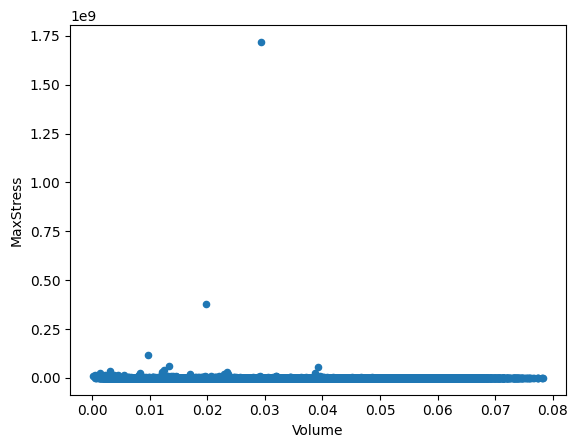

In [49]:
df_all.plot(kind="scatter", x="Volume", y="MaxStress")
plt.show()

In [50]:
from desdeo_tools.utilities import non_dominated

non_dom_inds = non_dominated(df_all[["Volume", "MaxStress"]].values)
df_nondom = df_all[non_dom_inds]
print(df_nondom.shape[0])
df_nondom.head()

521


,Volume,MaxStress,x1,x2,y,g1,Feasible
0,0.021916,18377.203009,0.002354,0.004815,2.115106,-81622.796991,1
1,0.031101,12991.022813,0.003331,0.006803,2.129376,-87008.977187,1
2,0.008704,46119.773223,0.000961,0.001948,2.022885,-53880.226777,1
3,0.038300,10514.420370,0.004061,0.008395,2.145074,-89485.579630,1
4,0.037292,10759.938300,0.004219,0.008331,1.977927,-89240.061700,1


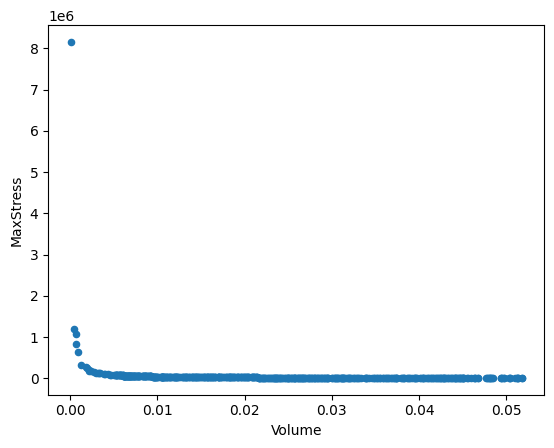

In [51]:
df_nondom.plot(kind="scatter", x="Volume", y="MaxStress")
plt.show()

In [56]:
class_1_mask = df_nondom["MaxStress"] > 0.1e6
class_2_mask = np.logical_and(df_nondom["Volume"] < 0.022, df_nondom["MaxStress"] < 0.1e6)
class_3_mask = np.logical_and(df_nondom["Volume"] > 0.022, df_nondom["MaxStress"] < 0.1e6)

print(f"Sum of masks {class_1_mask.sum() + class_2_mask.sum() + class_3_mask.sum()}, sum of data {df_nondom.shape[0]}")

Sum of masks 521, sum of data 521
